C:\Users\jaida\AppData\Local\Temp\ipykernel_11932\2812232238.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start="2018-01", end="2023-01", freq="M")
C:\Users\jaida\AppData\Local\Temp\ipykernel_11932\2812232238.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.asfreq("M")


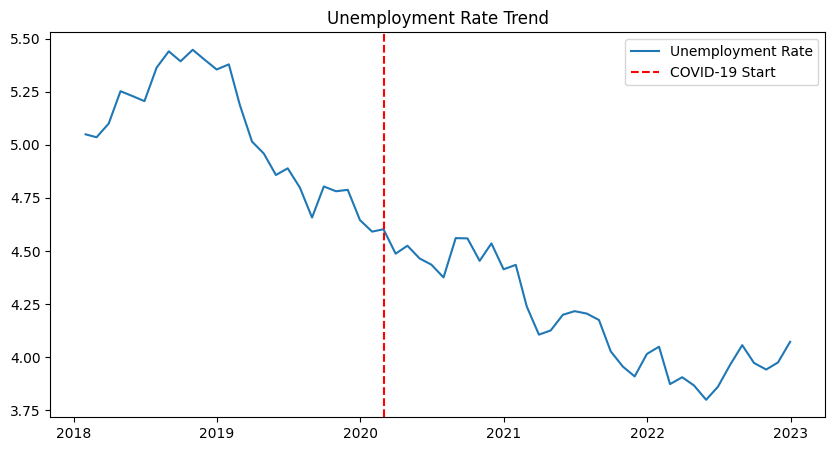

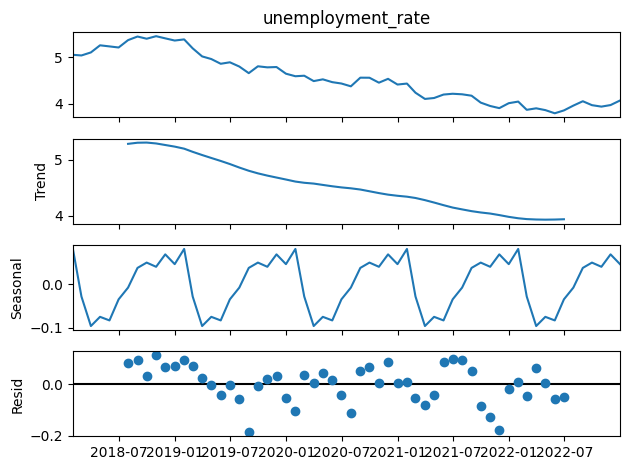

Mean pre-COVID: 5.047557980340499
Mean post-COVID: 4.169032020269488
T-test p-value: 5.726681544803548e-17


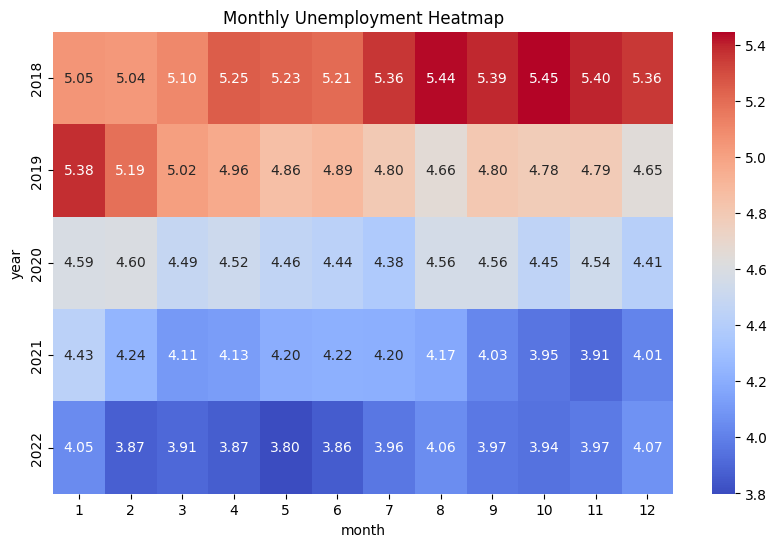


Insights:
- Unemployment spiked around COVID start (2020).
- Seasonal patterns suggest certain months have higher unemployment.
- Social policy should focus on job support during crisis periods.


In [4]:
# Unemployment Analysis without ruptures (simpler version)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind

# 1. Load dataset
# Example CSV: df = pd.read_csv("unemployment_data.csv", parse_dates=["date"])
date_rng = pd.date_range(start="2018-01", end="2023-01", freq="M")
np.random.seed(42)
unemployment = 5 + np.random.randn(len(date_rng)).cumsum()/10
df = pd.DataFrame({"date": date_rng, "unemployment_rate": unemployment})

# 2. Clean data
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df = df.asfreq("M")

# 3. Visualize trends
plt.figure(figsize=(10,5))
plt.plot(df.index, df["unemployment_rate"], label="Unemployment Rate")
plt.axvline(pd.to_datetime("2020-03"), color="r", linestyle="--", label="COVID-19 Start")
plt.legend()
plt.title("Unemployment Rate Trend")
plt.show()

# 4. Decompose seasonality & trend
decomposition = seasonal_decompose(df["unemployment_rate"], model="additive", period=12)
decomposition.plot()
plt.show()

# 5. COVID-19 Impact (t-test pre vs post March 2020)
pre_covid = df.loc[df.index < "2020-03", "unemployment_rate"]
post_covid = df.loc[df.index >= "2020-03", "unemployment_rate"]

t_stat, p_val = ttest_ind(pre_covid, post_covid, equal_var=False)
print("Mean pre-COVID:", pre_covid.mean())
print("Mean post-COVID:", post_covid.mean())
print("T-test p-value:", p_val)

# 6. Seasonality heatmap
df["year"] = df.index.year
df["month"] = df.index.month
pivot = df.pivot_table(values="unemployment_rate", index="year", columns="month")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Unemployment Heatmap")
plt.show()

# 7. Insights
print("\nInsights:")
print("- Unemployment spiked around COVID start (2020).")
print("- Seasonal patterns suggest certain months have higher unemployment.")
print("- Social policy should focus on job support during crisis periods.")
